# Introdução Data Science - Ana Beatriz Macedo<img src="https://octocat-generator-assets.githubusercontent.com/my-octocat-1626096942740.png" width="324" height="324" align="right">
## Link para download: https://github.com/AnabeatrizMacedo241/DataScience-101
## Github: https://github.com/AnabeatrizMacedo241
## Linkedin: https://www.linkedin.com/in/ana-beatriz-oliveira-de-macedo-85b05b215/

Documentação Pandas: https://pandas.pydata.org/pandas-docs/stable/index.html
![blue-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [157]:
import pandas as pd
imdb_review = pd.read_csv('IMDB_movie_reviews_details.csv', header=0, sep=',')
imdb_review['votes'] = [x.replace(',', '.') for x in imdb_review['votes']]
imdb_review['gross'] = [x.replace('M', '') for x in imdb_review['gross']]
imdb_review['gross'] = [x.replace('$', '') for x in imdb_review['gross']]
del imdb_review['Unnamed: 0']
imdb_review.drop(['Unnamed: 0'], axis = 1) #Aqui é um outro jeito de deletar colunas
imdb_review.drop(['Unnamed: 0'], axis=1,inplace=True)
#Retomando a aula passado com o gráfico imdb_review

In [158]:
imdb_review

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,2.394.059,28.34
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,1.658.439,134.97
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,2.355.907,534.86
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,1.152.912,57.30
4,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,A jury holdout attempts to prevent a miscarria...,706.079,4.36
...,...,...,...,...,...,...,...,...,...
742,Kelly's Heroes,1970,144,"Adventure, Comedy, War",7.6,50.0,A group of U.S. soldiers sneaks across enemy l...,45.985,1.38
743,The Jungle Book,1967,78,"Animation, Adventure, Family",7.6,65.0,Bagheera the Panther and Baloo the Bear have a...,168.985,141.84
744,A Hard Day's Night,1964,87,"Comedy, Musical",7.6,96.0,"Over two ""typical"" days in the life of The Bea...",40.931,13.78
745,Shane,1953,118,"Drama, Western",7.6,80.0,A weary gunfighter attempts to settle down wit...,37.753,20.00


In [159]:
imdb_review.info() #apesar de serem números 'votes'e 'gross'ainda estão como strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       747 non-null    object 
 1   year       747 non-null    object 
 2   runtime    747 non-null    int64  
 3   genre      747 non-null    object 
 4   rating     747 non-null    float64
 5   metascore  747 non-null    float64
 6   timeline   747 non-null    object 
 7   votes      747 non-null    object 
 8   gross      747 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 52.6+ KB


In [160]:
imdb_review["gross"] = pd.to_numeric(imdb_review["gross"], downcast="float")
imdb_review["votes"] = pd.to_numeric(imdb_review["votes"], errors="coerce")
imdb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       747 non-null    object 
 1   year       747 non-null    object 
 2   runtime    747 non-null    int64  
 3   genre      747 non-null    object 
 4   rating     747 non-null    float64
 5   metascore  747 non-null    float64
 6   timeline   747 non-null    object 
 7   votes      702 non-null    float64
 8   gross      747 non-null    float32
dtypes: float32(1), float64(3), int64(1), object(4)
memory usage: 49.7+ KB


In [161]:
media = imdb_review['runtime'].mean()
media #A média de tempo dos filmes é de aproximadamente 2 horas.

123.3293172690763

In [162]:
mediana = imdb_review['runtime'].median()
mediana #A mediana

120.0

In [163]:
moda = imdb_review['runtime'].mode()[0]
moda #E a suma moda, que é o valor que mais aparece 

130

In [164]:
print(imdb_review.duplicated()) 
#Com duplicated() nós podemos checar se as linhas estão se repetindo.

0      False
1      False
2      False
3      False
4      False
       ...  
742    False
743    False
744    False
745    False
746    False
Length: 747, dtype: bool


In [165]:
#Caso existirem, removemos elas
imdb_review.drop_duplicates(inplace = True)

In [166]:
#corr são as correlações entre as colunas e seus resultados variam de -1 a 1(A correlação perfeita).
#Vemos essa correlação perfeita na linha runtime, na linha rating e na linha metascore.
imdb_review.corr()

,runtime,rating,metascore,votes,gross
runtime,1.000000,0.254789,-0.012727,0.069107,0.173930
rating,0.254789,1.000000,0.283134,0.376014,0.119698
metascore,-0.012727,0.283134,1.000000,-0.026609,-0.038429
votes,0.069107,0.376014,-0.026609,1.000000,0.571879
gross,0.173930,0.119698,-0.038429,0.571879,1.000000


![blue-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Agora será mais interessante, pois entenderemos melhor os dados da tabela criando gráficos!
Essa é a documentação da biblioteca que iremos usar para essa aula: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

<function matplotlib.pyplot.show(close=None, block=None)>

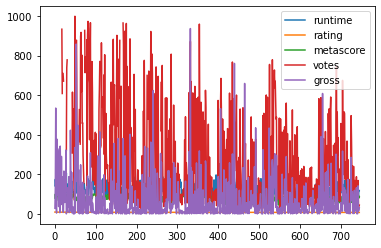

In [167]:
#Iremos importar uma bilioteca para isso
import matplotlib.pyplot as plt
imdb_review.plot() #Aqui retorna um gráfico com todos os valores, mas ainda fica difícil obtermos informações dele
plt.show

<AxesSubplot:ylabel='Frequency'>

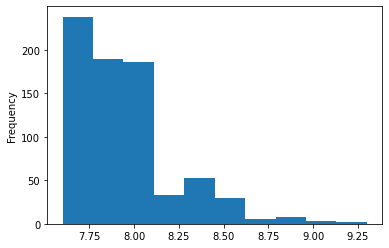

In [168]:
#Vamos pegar algumas colunas específicas e outros tipo de gráfico agora
imdb_review["rating"].plot(kind = 'hist')
#Aqui vemos um histograma com as avaliações dos filmes e quantas vezes apareceram

<AxesSubplot:ylabel='Frequency'>

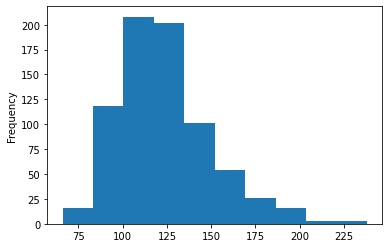

In [169]:
imdb_review['runtime'].plot(kind='hist') 
#Aqui é possível ver que a maior parte dos filmes tem em média 2 horas de filme

In [170]:
the_godfather=imdb_review.loc[imdb_review['name']== 'The Godfather']
display(the_godfather)

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,NaN,134.970001


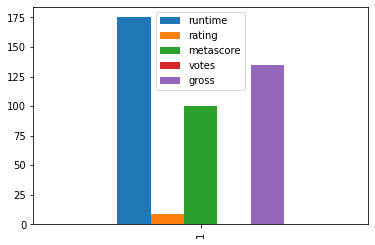

In [171]:
gráfico_godfather = the_godfather.plot.bar()

In [172]:
comédia=imdb_review.loc[imdb_review['genre']== 'Comedy']
display(comédia)

,name,year,runtime,genre,rating,metascore,timeline,votes,gross
67,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,Comedy,8.4,97.0,An insane general triggers a path to nuclear h...,457.287,0.280000
195,Monty Python's Life of Brian,1979,94,Comedy,8.1,77.0,Born on the original Christmas in the stable n...,373.225,20.049999
293,Young Frankenstein,1974,106,Comedy,8.0,80.0,An American grandson of the infamous scientist...,145.431,86.300003
389,The Discreet Charm of the Bourgeoisie,1972,102,Comedy,7.9,93.0,"A surreal, virtually plotless series of dreams...",39.624,0.200000
484,Ferris Bueller's Day Off,1986,103,Comedy,7.8,61.0,A high school wise guy is determined to have a...,326.537,70.139999
538,The Hangover,2009,100,Comedy,7.7,73.0,Three buddies wake up from a bachelor party in...,727.280,277.320007
586,Office Space,1999,89,Comedy,7.7,68.0,Three company workers who hate their jobs deci...,246.036,10.820000
595,Le Dîner de Cons,1998,80,Comedy,7.7,73.0,"A few friends have a weekly fools' dinner, whe...",38.004,4.070000
602,Clerks,1994,92,Comedy,7.7,70.0,A day in the lives of two convenience clerks n...,213.316,3.150000
628,Airplane!,1980,88,Comedy,7.7,78.0,A man afraid to fly must ensure that a plane l...,218.862,83.400002


In [173]:
comédia = imdb_review['rating'].mean()
comédia #Média de avaliação dos filmes de comédia

7.937349397590403

<AxesSubplot:>

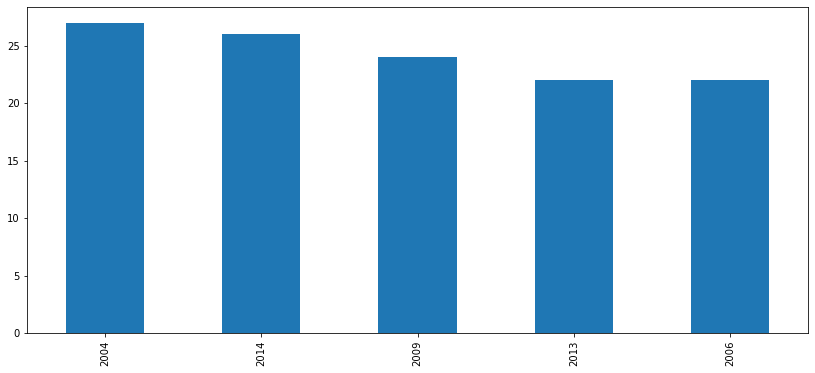

In [183]:
imdb_review['year'].value_counts().head().plot(kind='bar', figsize=(14, 6))
#Aqui conta quantitade de filmes por ano, sendo que com head() retornei os 5 anos com mais filmes

<AxesSubplot:>

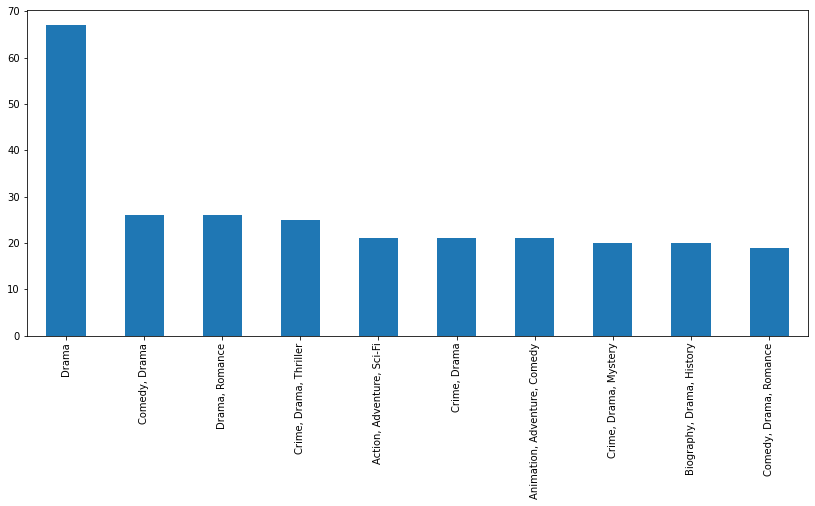

In [191]:
imdb_review['genre'].value_counts().head(10).plot(kind='bar', figsize=(14, 6))

![blue-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [209]:
#Testando gráficos com outra tabela da aula passada
df2 = pd.DataFrame({'Times': ['Boston Celtics', 'Los Angeles Lakers', 'Golden State Warriors', 'Chicago Bulls',
                              'San Antonio Spurs', 'Philadelphia 76ers', 'Detroit Pistons', 'Miami Heat',
                              'New York Knicks', 'Houston Rockets'],
                    'Títulos': [17, 17, 6, 6, 5, 3, 3, 3, 2, 2],
                   'Finais': [21, 33, 11, 6, 6, 9, 7, 6, 8, 4],
                    
                   })
df2.set_index('Times', inplace=True)
df2

,Títulos,Finais
Times,,
Boston Celtics,17,21
Los Angeles Lakers,17,33
Golden State Warriors,6,11
Chicago Bulls,6,6
San Antonio Spurs,5,6
Philadelphia 76ers,3,9
Detroit Pistons,3,7
Miami Heat,3,6
New York Knicks,2,8


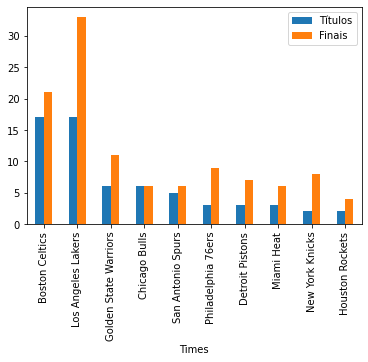

In [210]:
nba_gráfico = df2.plot.bar()

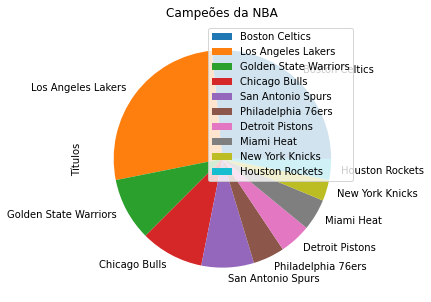

In [211]:
plot = df2.plot.pie(y='Títulos', figsize=(11,5), title='Campeões da NBA')

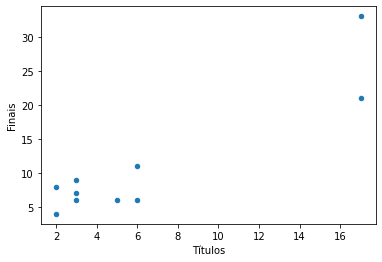

In [212]:
plot2 = df2.plot.scatter(x='Títulos', y='Finais')

#### Nessa aula vimos um pouco sobre selecionar certas colunas e items, depois plotar gráficos. 
### Até a próxima aula e bons estudos!
## Ana Beatriz Macedo
![blue-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)